# 6.5 - Unsupervised Machine Learning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
#establishing a path
path = r'C:\Users\harkn\OneDrive\Desktop\Tasks\Data Immersion\Achievement 6 - IndeGo BikeShare'

In [5]:
#importing dataframes
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '11-1_cleaned_data_full.pkl'))

In [6]:
df.head()

trip_id  duration          start_time            end_time  start_station  \
0  579507686        70 2023-01-01 00:00:00 2023-01-01 01:10:00           3063   
1  579499091        17 2023-01-01 00:05:00 2023-01-01 00:22:00           3190   
2  579499089        11 2023-01-01 00:06:00 2023-01-01 00:17:00           3182   
3  579499087         1 2023-01-01 00:08:00 2023-01-01 00:09:00           3026   
4  579499085        27 2023-01-01 00:09:00 2023-01-01 00:36:00           3046   

   start_lat  start_lon  end_station    end_lat    end_lon  ...  \
0  39.946331 -75.169800         3063  39.946331 -75.169800  ...   
1  39.948921 -75.169907         3207  39.954411 -75.192001  ...   
2  39.950809 -75.169533         3102  39.967590 -75.179520  ...   
3  39.941818 -75.145500         3026  39.941818 -75.145500  ...   
4  39.950119 -75.144722         3112  39.953732 -75.218246  ...   

   start_station_name                            end_station_name  \
0         17th & Pine                                 17th & Pine   
1       17th & Locust                             34th & Chestnut   
2       17th & Sansom  Pennsylvania & Fairmount Perelman Building   
3       2nd & Lombard                               2nd & Lombard   
4        2nd & Market                               48th & Spruce   

  trip_category_code bike_type_code  start_date start_time_of_day    end_date  \
0                  0              1  2023-01-01          00:00:00  2023-01-01   
1                  1              0  2023-01-01          00:05:00  2023-01-01   
2                  1              1  2023-01-01          00:06:00  2023-01-01   
3                  0              1  2023-01-01          00:08:00  2023-01-01   
4                  1              1  2023-01-01          00:09:00  2023-01-01   

   end_time_of_day              start_point                end_point  
0         01:10:00    (39.946331, -75.1698)    (39.946331, -75.1698)  
1         00:22:00  (39.948921, -75.169907)  (39.954411, -75.192001)  
2         00:17:00  (39.950809, -75.169533)    (39.96759, -75.17952)  
3         00:09:00    (39.941818, -75.1455)    (39.941818, -75.1455)  
4         00:36:00  (39.950119, -75.144722)  (39.953732, -75.218246)  

[5 rows x 25 columns]

In [7]:
df.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'start_station_name', 'end_station_name',
       'trip_category_code', 'bike_type_code', 'start_date',
       'start_time_of_day', 'end_date', 'end_time_of_day', 'start_point',
       'end_point'],
      dtype='object')

### Prepping for kMeans

In [9]:
df_kmeans = df[['duration', 'start_time', 'end_time', 'start_station', 'end_station', 'start_date',
       'start_time_of_day', 'end_date', 'end_time_of_day', 'start_point', 'end_point']]

In [10]:
df_kmeans.head()

duration          start_time            end_time  start_station  \
0        70 2023-01-01 00:00:00 2023-01-01 01:10:00           3063   
1        17 2023-01-01 00:05:00 2023-01-01 00:22:00           3190   
2        11 2023-01-01 00:06:00 2023-01-01 00:17:00           3182   
3         1 2023-01-01 00:08:00 2023-01-01 00:09:00           3026   
4        27 2023-01-01 00:09:00 2023-01-01 00:36:00           3046   

   end_station  start_date start_time_of_day    end_date end_time_of_day  \
0         3063  2023-01-01          00:00:00  2023-01-01        01:10:00   
1         3207  2023-01-01          00:05:00  2023-01-01        00:22:00   
2         3102  2023-01-01          00:06:00  2023-01-01        00:17:00   
3         3026  2023-01-01          00:08:00  2023-01-01        00:09:00   
4         3112  2023-01-01          00:09:00  2023-01-01        00:36:00   

               start_point                end_point  
0    (39.946331, -75.1698)    (39.946331, -75.1698)  
1  (39.948921, -75.169907)  (39.954411, -75.192001)  
2  (39.950809, -75.169533)    (39.96759, -75.17952)  
3    (39.941818, -75.1455)    (39.941818, -75.1455)  
4  (39.950119, -75.144722)  (39.953732, -75.218246)

In [11]:
df_kmeans.columns

Index(['duration', 'start_time', 'end_time', 'start_station', 'end_station',
       'start_date', 'start_time_of_day', 'end_date', 'end_time_of_day',
       'start_point', 'end_point'],
      dtype='object')

In [12]:
df_kmeans.dtypes

duration                      int64
start_time           datetime64[ns]
end_time             datetime64[ns]
start_station                 int64
end_station                   int64
start_date                   object
start_time_of_day            object
end_date                     object
end_time_of_day              object
start_point                  object
end_point                    object
dtype: object

In [13]:
# Convert 'start_time' and 'end_time' to Unix timestamps in seconds (int64)
df_kmeans['start_time'] = df_kmeans['start_time'].astype('int64') // 10**9
df_kmeans['end_time'] = df_kmeans['end_time'].astype('int64') // 10**9

C:\Users\harkn\AppData\Local\Temp\ipykernel_49964\2783011347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['start_time'] = df_kmeans['start_time'].astype('int64') // 10**9
C:\Users\harkn\AppData\Local\Temp\ipykernel_49964\2783011347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['end_time'] = df_kmeans['end_time'].astype('int64') // 10**9


In [14]:
# Convert datetime columns to Unix timestamps in seconds (int64)
datetime_columns = ['start_date', 'start_time_of_day', 'end_date', 'end_time_of_day']
for col in datetime_columns:
    df_kmeans[col] = pd.to_datetime(df_kmeans[col], errors='coerce').astype('int64') // 10**9

C:\Users\harkn\AppData\Local\Temp\ipykernel_49964\4140992803.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans[col] = pd.to_datetime(df_kmeans[col], errors='coerce').astype('int64') // 10**9
C:\Users\harkn\AppData\Local\Temp\ipykernel_49964\4140992803.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans[col] = pd.to_datetime(df_kmeans[col], errors='coerce').astype('int64') // 10**9
C:\Users\harkn\AppData\Local\Temp\ipykernel_49964\4140992803.py:4: SettingWithCopyWarning: 
A value is try

In [15]:
# Convert 'start_point' and 'end_point' to integers if possible
# Assuming 'start_point' and 'end_point' are tuples or strings, let's first convert them to strings if needed
df_kmeans['start_point'] = df_kmeans['start_point'].astype(str).apply(hash).astype('int64')
df_kmeans['end_point'] = df_kmeans['end_point'].astype(str).apply(hash).astype('int64')

C:\Users\harkn\AppData\Local\Temp\ipykernel_49964\2884076715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['start_point'] = df_kmeans['start_point'].astype(str).apply(hash).astype('int64')
C:\Users\harkn\AppData\Local\Temp\ipykernel_49964\2884076715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['end_point'] = df_kmeans['end_point'].astype(str).apply(hash).astype('int64')


In [16]:
df_kmeans.head()

duration  start_time    end_time  start_station  end_station  start_date  \
0        70  1672531200  1672535400           3063         3063  1672531200   
1        17  1672531500  1672532520           3190         3207  1672531200   
2        11  1672531560  1672532220           3182         3102  1672531200   
3         1  1672531680  1672531740           3026         3026  1672531200   
4        27  1672531740  1672533360           3046         3112  1672531200   

   start_time_of_day    end_date  end_time_of_day          start_point  \
0        -9223372037  1672531200      -9223372037  2351934154504524692   
1        -9223372037  1672531200      -9223372037  4030943340565028051   
2        -9223372037  1672531200      -9223372037 -3957391786427599868   
3        -9223372037  1672531200      -9223372037 -9175321697113672714   
4        -9223372037  1672531200      -9223372037 -1538332145470988301   

             end_point  
0  2351934154504524692  
1 -7094714006910434615  
2  1913729264820920913  
3 -9175321697113672714  
4 -4454956903327798150

In [17]:
df_kmeans.dtypes

duration             int64
start_time           int64
end_time             int64
start_station        int64
end_station          int64
start_date           int64
start_time_of_day    int64
end_date             int64
end_time_of_day      int64
start_point          int64
end_point            int64
dtype: object

### Standardize the values

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# Initialize the scaler
scaler = StandardScaler()

In [21]:
# Fit and transform only the numeric columns in df_kmeans
numeric_columns = df_kmeans.select_dtypes(include=['float64', 'int64']).columns  # Select only numeric columns
df_kmeans[numeric_columns] = scaler.fit_transform(df_kmeans[numeric_columns])

C:\Users\harkn\AppData\Local\Temp\ipykernel_49964\491808413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans[numeric_columns] = scaler.fit_transform(df_kmeans[numeric_columns])


In [22]:
df_kmeans.head()

duration  start_time  end_time  start_station  end_station  start_date  \
0  1.174691   -2.111684 -2.111292      -0.745614    -0.731986   -2.105163   
1  0.017521   -2.111646 -2.111650       0.468831     0.636844   -2.105163   
2 -0.113479   -2.111639 -2.111687       0.392331    -0.361261   -2.105163   
3 -0.331813   -2.111624 -2.111747      -1.099429    -1.083699   -2.105163   
4  0.235855   -2.111617 -2.111546      -0.908177    -0.266203   -2.105163   

   start_time_of_day  end_date  end_time_of_day  start_point  end_point  
0                0.0 -2.105227              0.0     0.419446   0.427165  
1                0.0 -2.105227              0.0     0.747931  -1.424061  
2                0.0 -2.105227              0.0    -0.814927   0.341292  
3                0.0 -2.105227              0.0    -1.835776  -1.831790  
4                0.0 -2.105227              0.0    -0.341656  -0.906757

In [34]:
df_kmeans.shape

(1084547, 11)

### Creating a smaller subset for Kmeans

In [24]:
#setting the seed
np.random.seed(4)

In [25]:
#assigning 'dev'
dev = np.random.rand(len(df_kmeans)) <= 0.2

In [26]:
#split into 'big' and 'small'
big = df_kmeans[dev]
small_df_kmeans = df_kmeans[~dev]

### The Elbow Technique

In [28]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [29]:
# List to store the scores (inertia values) for each k
scores = []

In [30]:
# Calculate KMeans for each number of clusters in num_cl
for i in num_cl:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)  # Set random_state for reproducibility
    kmeans.fit(small_df_kmeans)
    scores.append(-kmeans.score(small_df_kmeans)) 

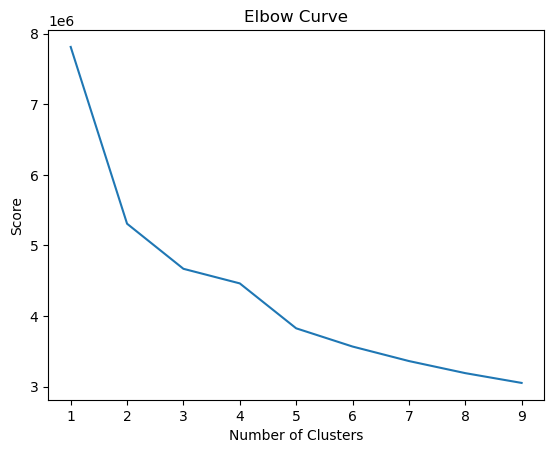

In [31]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,scores)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### I'm choosing '4' clusters because it is more interesting than '2'. I think more dimension will be important for the analysis.

### kmeans Clustering

In [34]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [35]:
# Fit the k-means object to the data.

kmeans.fit(small_df_kmeans)

C:\Users\harkn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [36]:
small_df_kmeans['clusters'] = kmeans.fit_predict(small_df_kmeans)

C:\Users\harkn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\harkn\AppData\Local\Temp\ipykernel_30464\3203608139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df_kmeans['clusters'] = kmeans.fit_predict(small_df_kmeans)


In [37]:
small_df_kmeans.head()

duration  start_time  end_time  start_station  end_station  start_date  \
0  1.174691   -2.111684 -2.111292      -0.745614    -0.731986   -2.105163   
1  0.017521   -2.111646 -2.111650       0.468831     0.636844   -2.105163   
2 -0.113479   -2.111639 -2.111687       0.392331    -0.361261   -2.105163   
3 -0.331813   -2.111624 -2.111747      -1.099429    -1.083699   -2.105163   
4  0.235855   -2.111617 -2.111546      -0.908177    -0.266203   -2.105163   

   start_time_of_day  end_date  end_time_of_day  start_point  end_point  \
0                0.0 -2.105227              0.0     0.240188   0.215963   
1                0.0 -2.105227              0.0     0.406506  -0.870901   
2                0.0 -2.105227              0.0     1.492566   1.089815   
3                0.0 -2.105227              0.0    -0.553537  -0.574372   
4                0.0 -2.105227              0.0     1.138487  -0.267379   

   clusters  
0         1  
1         1  
2         1  
3         1  
4         1

In [38]:
small_df_kmeans['clusters'].value_counts()

clusters
0    320079
2    317976
1    227605
3      1553
Name: count, dtype: int64

*****Group 3 is the smallest by a lot.

In [39]:
small_df_kmeans.columns

Index(['duration', 'start_time', 'end_time', 'start_station', 'end_station',
       'start_date', 'start_time_of_day', 'end_date', 'end_time_of_day',
       'start_point', 'end_point', 'clusters'],
      dtype='object')

C:\Users\harkn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


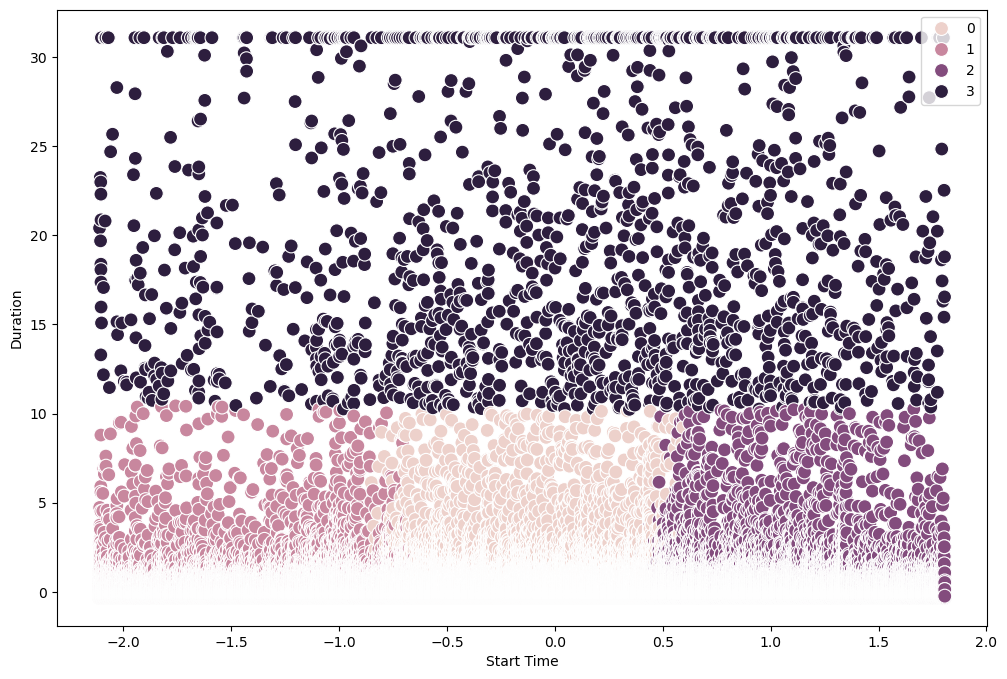

In [81]:
# Plot the clusters for the "duration" and "start_time" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=small_df_kmeans['start_time'], y=small_df_kmeans['duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start Time') # Label x-axis.
plt.ylabel('Duration') # Label y-axis.
plt.show()

C:\Users\harkn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


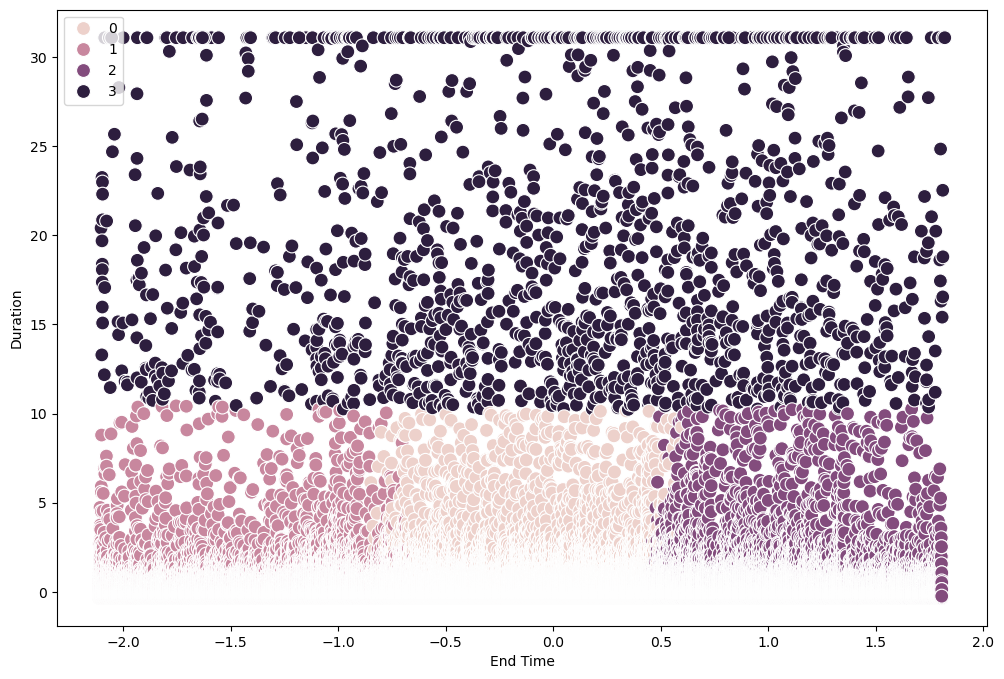

In [82]:
# Plot the clusters for the "duration" and "end_time" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=small_df_kmeans['end_time'], y=small_df_kmeans['duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('End Time') # Label x-axis.
plt.ylabel('Duration') # Label y-axis.
plt.show()

I notice a strong correlation between Groups 0, 1, and 2 which I will be labeling to be "Morning" "Daytime" and "Night" riders. Group 3 would be "Distance" riders

C:\Users\harkn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


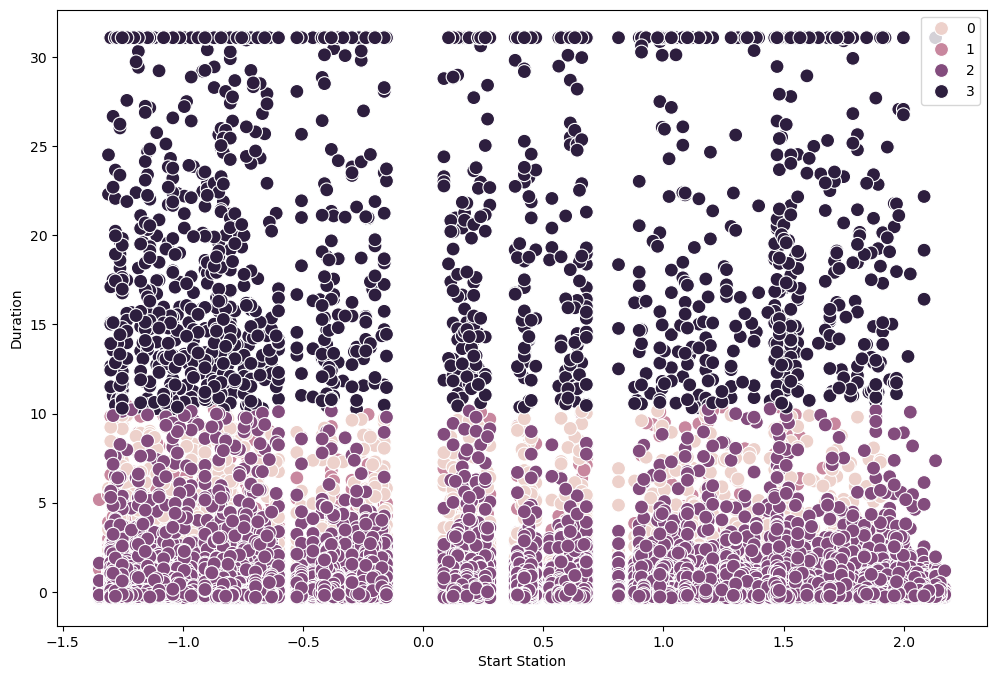

In [40]:
# Plot the clusters for the "duration" and "start_station" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=small_df_kmeans['start_station'], y=small_df_kmeans['duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start Station') # Label x-axis.
plt.ylabel('Duration') # Label y-axis.
plt.show()

C:\Users\harkn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


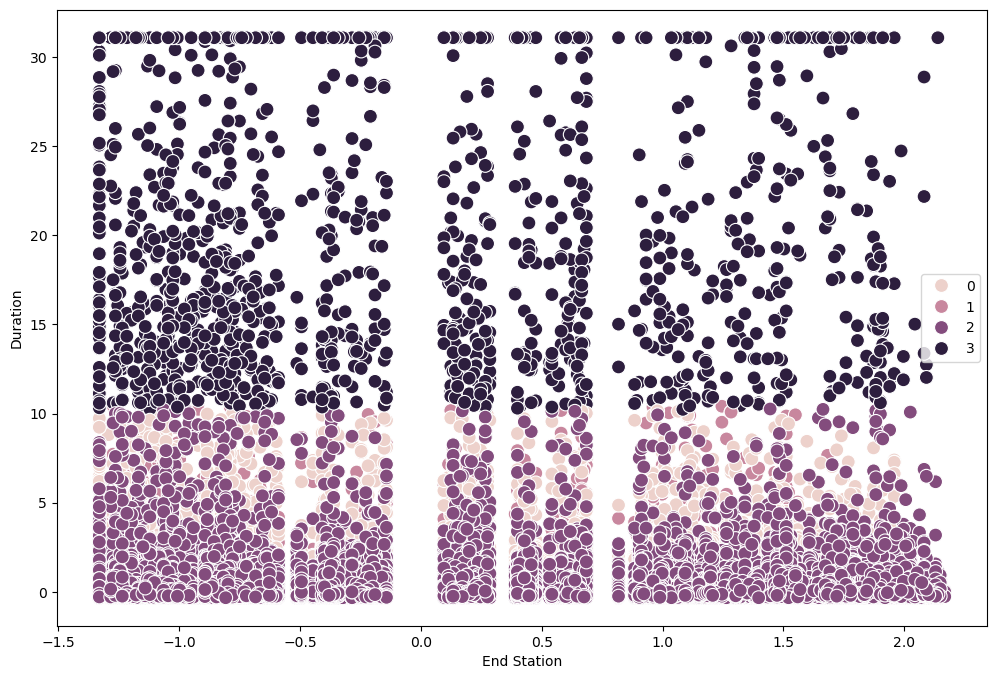

In [41]:
# Plot the clusters for the "duration" and "end_station" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=small_df_kmeans['end_station'], y=small_df_kmeans['duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('End Station') # Label x-axis.
plt.ylabel('Duration') # Label y-axis.
plt.show()

There seems to be no strong correlation between 'duration' and 'start/end station'. Group 3 appears to be longer duration rides.

C:\Users\harkn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


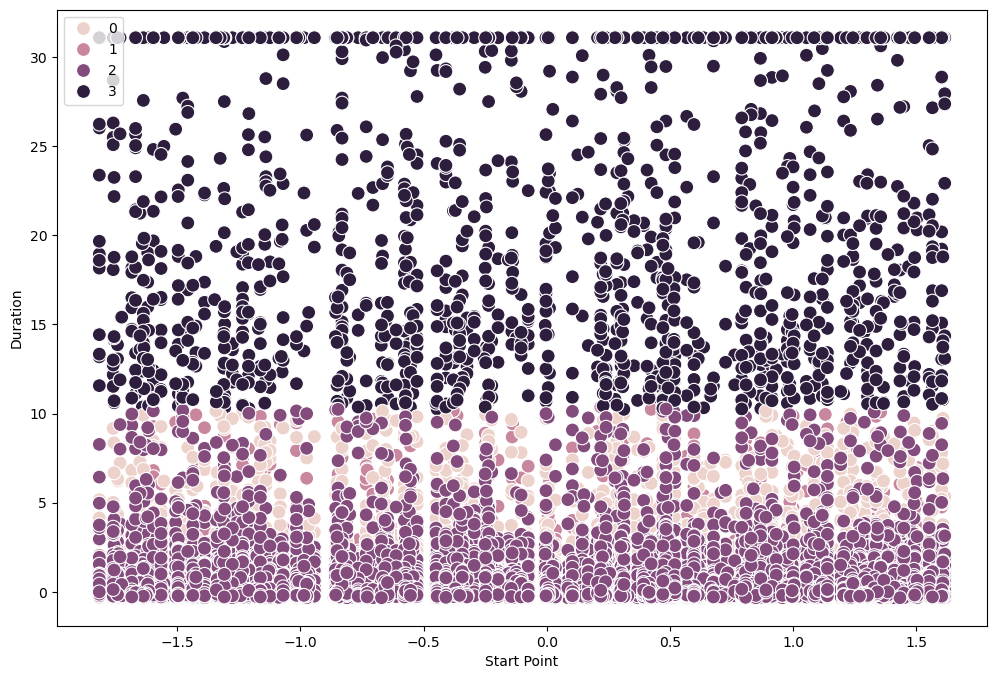

In [84]:
# Plot the clusters for the "duration" and "start_point" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=small_df_kmeans['start_point'], y=small_df_kmeans['duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start Point') # Label x-axis.
plt.ylabel('Duration') # Label y-axis.
plt.show()

C:\Users\harkn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


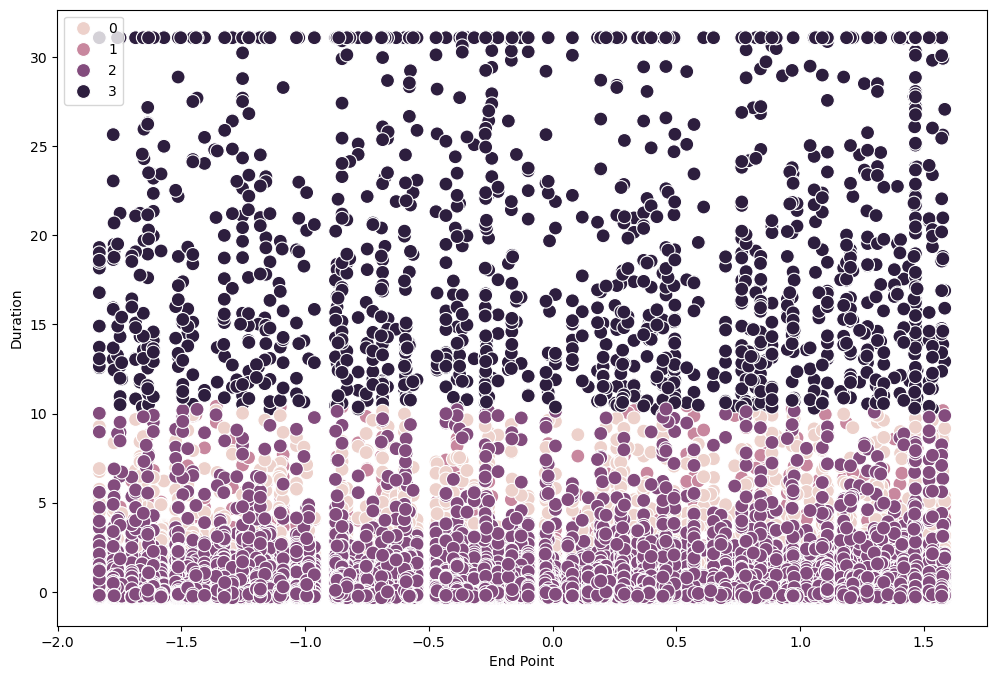

In [85]:
# Plot the clusters for the "duration" and "end_point" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=small_df_kmeans['end_point'], y=small_df_kmeans['duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('End Point') # Label x-axis.
plt.ylabel('Duration') # Label y-axis.
plt.show()

Similarly to 'start/end station', I notice no significant correlation between 'duration' and 'start/end point'

C:\Users\harkn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


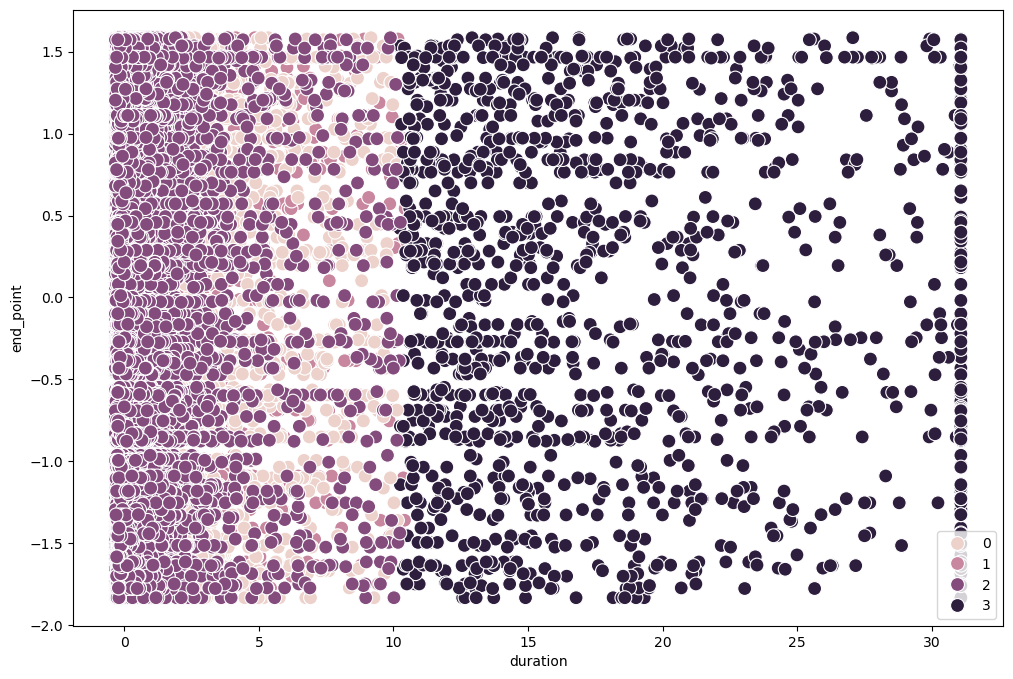

In [95]:
# Plot the clusters for the "duration" and "end_point" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=small_df_kmeans['duration'], y=small_df_kmeans['end_point'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('duration') # Label x-axis.
plt.ylabel('end_point') # Label y-axis.
plt.show()

This was a test and the result was exactly as I expected.

C:\Users\harkn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


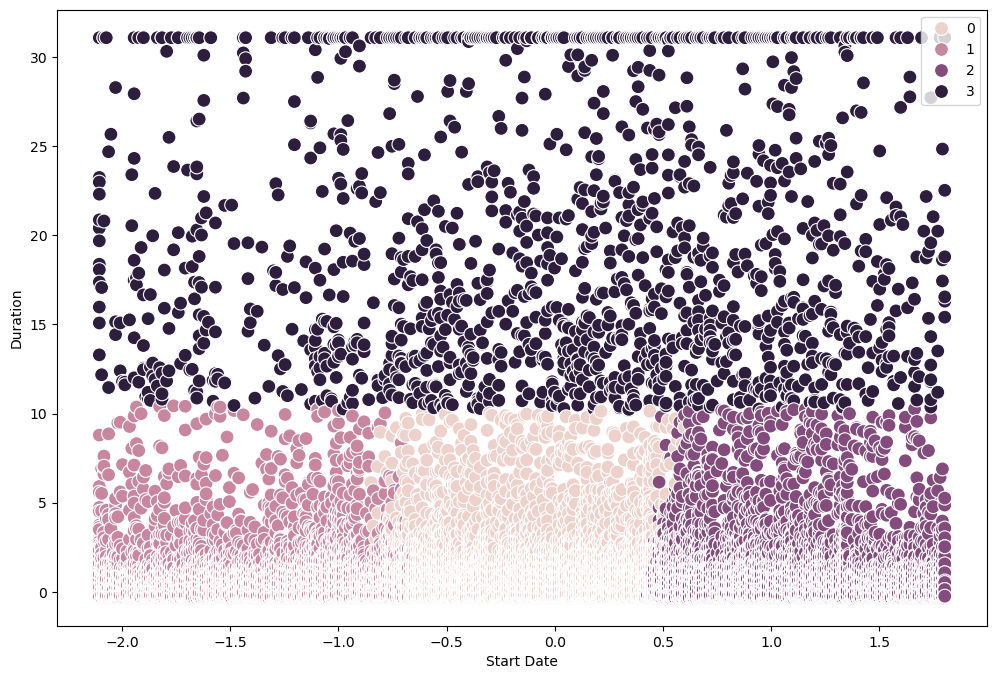

In [109]:
# Plot the clusters for the "duration" and "start_date" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=small_df_kmeans['start_date'], y=small_df_kmeans['duration'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Start Date') # Label x-axis.
plt.ylabel('Duration') # Label y-axis.
plt.show()

C:\Users\harkn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


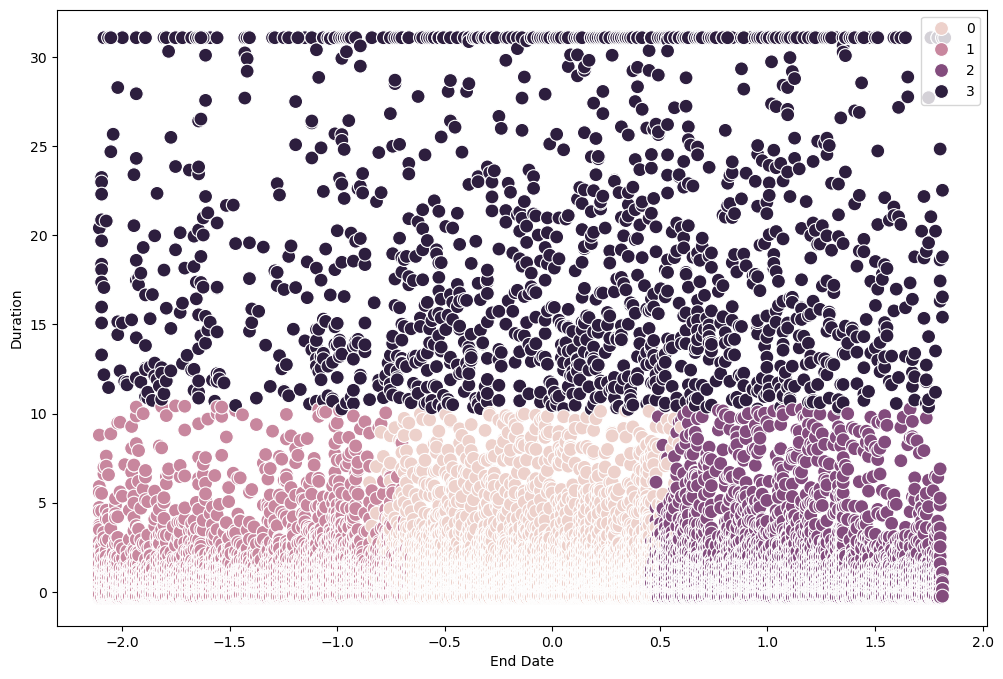

In [113]:
# Plot the clusters for the "duration" and "end_date" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=small_df_kmeans['end_date'], y=small_df_kmeans['duration'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('End Date') # Label x-axis.
plt.ylabel('Duration') # Label y-axis.
plt.show()

I see a similar correlation to 'start/end_time', although there are more riders overall in the summer months, the difference is not as extreme as i would have predicted.

## Descriptive Statistics

In [116]:
small_df_kmeans.groupby('clusters').agg({'duration':['mean', 'median'], 
                         'start_time':['mean', 'median'], 
                         'end_time':['mean', 'median'],
                         'start_station':['mean', 'median'], 
                         'end_station':['mean', 'median'], 
                         'start_point':['mean', 'median'], 
                         'end_point':['mean', 'median'],
                         'start_date':['mean', 'median'], 
                         'end_date':['mean', 'median']})

duration            start_time            end_time            \
               mean     median       mean    median      mean    median   
clusters                                                                  
0         -0.009162  -0.135313  -0.098542 -0.075846 -0.098551 -0.075854   
1         -0.041465  -0.135313  -1.319762 -1.259704 -1.319785 -1.259759   
2         -0.058649  -0.157146   1.045180  1.016378  1.045155  1.016334   
3         20.328978  18.466742   0.048728  0.161506  0.059094  0.176879   

         start_station           end_station           start_point            \
                  mean    median        mean    median        mean    median   
clusters                                                                       
0             0.016439 -0.200548    0.017223 -0.190157    0.029178  0.218677   
1            -0.168232 -0.391799   -0.165859 -0.389778    0.003344  0.103589   
2             0.101599  0.124579    0.104627  0.133039   -0.033587  0.005375   
3             0.085652 -0.162298   -0.150977 -0.408790   -0.048454 -0.006833   

         end_point           start_date            end_date            
              mean    median       mean    median      mean    median  
clusters                                                               
0         0.025828  0.194544  -0.098605 -0.076134 -0.098621 -0.076206  
1         0.012382  0.119865  -1.319722 -1.257050 -1.319748 -1.257118  
2        -0.035481  0.000817   1.045218  1.018898  1.045189  1.018821  
3         0.174963  0.304395   0.048242  0.160050  0.061317  0.181448

The results are standardized, so they are difficult to interpret in this form. 

# reversing standardization

In [139]:
# Convert standardized data back to original scale
df_kmeans_original = small_df_kmeans.copy()  # Make a copy to avoid modifying the standardized DataFrame
df_kmeans_original[numeric_columns] = scaler.inverse_transform(small_df_kmeans[numeric_columns])

In [141]:
df_kmeans_original.head()

duration    start_time      end_time  start_station  end_station  \
0      70.0  1.672531e+09  1.672535e+09         3063.0       3063.0   
1      17.0  1.672532e+09  1.672533e+09         3190.0       3207.0   
2      11.0  1.672532e+09  1.672532e+09         3182.0       3102.0   
3       1.0  1.672532e+09  1.672532e+09         3026.0       3026.0   
4      27.0  1.672532e+09  1.672533e+09         3046.0       3112.0   

     start_date  start_time_of_day      end_date  end_time_of_day  \
0  1.672531e+09      -9.223372e+09  1.672531e+09    -9.223372e+09   
1  1.672531e+09      -9.223372e+09  1.672531e+09    -9.223372e+09   
2  1.672531e+09      -9.223372e+09  1.672531e+09    -9.223372e+09   
3  1.672531e+09      -9.223372e+09  1.672531e+09    -9.223372e+09   
4  1.672531e+09      -9.223372e+09  1.672531e+09    -9.223372e+09   

    start_point     end_point  clusters  
0  1.789571e+18  1.789571e+18         1  
1  2.678321e+18 -4.043227e+18         1  
2  8.481908e+18  6.479210e+18         1  
3 -2.451865e+18 -2.451865e+18         1  
4  6.589814e+18 -8.043489e+17         1

In [143]:
# Convert Unix timestamp integers back to datetime
df_kmeans_original['start_time'] = pd.to_datetime(df_kmeans_original['start_time'], unit='s')
df_kmeans_original['end_time'] = pd.to_datetime(df_kmeans_original['end_time'], unit='s')

In [145]:
# Convert Unix timestamp integers back to datetime for specified columns
datetime_columns = ['start_date', 'start_time_of_day', 'end_date', 'end_time_of_day']
for col in datetime_columns:
    df_kmeans_original[col] = pd.to_datetime(df_kmeans_original[col], unit='s', errors='coerce')

In [147]:
df_kmeans_original.head()

duration          start_time            end_time  start_station  \
0      70.0 2023-01-01 00:00:00 2023-01-01 01:10:00         3063.0   
1      17.0 2023-01-01 00:05:00 2023-01-01 00:22:00         3190.0   
2      11.0 2023-01-01 00:06:00 2023-01-01 00:17:00         3182.0   
3       1.0 2023-01-01 00:08:00 2023-01-01 00:09:00         3026.0   
4      27.0 2023-01-01 00:09:00 2023-01-01 00:36:00         3046.0   

   end_station start_date start_time_of_day   end_date end_time_of_day  \
0       3063.0 2023-01-01               NaT 2023-01-01             NaT   
1       3207.0 2023-01-01               NaT 2023-01-01             NaT   
2       3102.0 2023-01-01               NaT 2023-01-01             NaT   
3       3026.0 2023-01-01               NaT 2023-01-01             NaT   
4       3112.0 2023-01-01               NaT 2023-01-01             NaT   

    start_point     end_point  clusters  
0  1.789571e+18  1.789571e+18         1  
1  2.678321e+18 -4.043227e+18         1  
2  8.481908e+18  6.479210e+18         1  
3 -2.451865e+18 -2.451865e+18         1  
4  6.589814e+18 -8.043489e+17         1

# Final descriptive statistics

In [149]:
df_kmeans_original.groupby('clusters').agg({'duration':['mean', 'median'], 
                         'start_time':['mean', 'median'], 
                         'end_time':['mean', 'median'],
                         'start_station':['mean', 'median'], 
                         'end_station':['mean', 'median'], 
                         'start_point':['mean', 'median'], 
                         'end_point':['mean', 'median'],
                         'start_date':['mean', 'median'], 
                         'end_date':['mean', 'median']})

duration                           start_time                      \
                mean median                          mean              median   
clusters                                                                        
0          15.777892   10.0 2023-07-07 12:22:47.759271936 2023-07-09 15:07:00   
1          14.298359   10.0 2023-03-15 18:20:28.671777792 2023-03-21 08:36:00   
2          13.511303    9.0 2023-10-22 01:10:15.438712320 2023-10-19 08:47:00   
3         947.292981  862.0 2023-07-21 05:36:05.022536960 2023-07-31 17:43:00   

                              end_time                     start_station  \
                                  mean              median          mean   
clusters                                                                   
0        2023-07-07 12:38:34.400194816 2023-07-09 15:23:00   3142.691339   
1        2023-03-15 18:34:46.609960192 2023-03-21 08:46:00   3123.379420   
2        2023-10-22 01:23:45.995546880 2023-10-19 08:58:00   3151.596828   
3        2023-07-22 05:03:28.667096064 2023-08-02 04:22:00   3149.929169   

                  end_station           start_point                \
          median         mean  median          mean        median   
clusters                                                            
0         3120.0  3141.816311  3120.0  6.619933e+17  1.674622e+18   
1         3100.0  3122.556183  3099.0  5.239436e+17  1.059624e+18   
2         3154.0  3151.011092  3154.0  3.265947e+17  5.347970e+17   
3         3124.0  3124.121700  3097.0  2.471534e+17  4.695618e+17   

             end_point                                  start_date             \
                  mean        median                          mean     median   
clusters                                                                        
0         7.691848e+17  1.674622e+18 2023-07-06 21:45:52.476732160 2023-07-09   
1         6.970247e+17  1.273849e+18 2023-03-15 03:53:39.192899840 2023-03-21   
2         4.401623e+17  6.349614e+17 2023-10-21 10:50:22.054494720 2023-10-19   
3         1.569537e+18  2.264150e+18 2023-07-20 14:02:51.538957056 2023-07-31   

                              end_date             
                                  mean     median  
clusters                                           
0        2023-07-06 21:53:22.725577216 2023-07-09  
1        2023-03-15 03:59:11.726895360 2023-03-21  
2        2023-10-21 10:56:46.808060928 2023-10-19  
3        2023-07-21 19:26:27.894397952 2023-08-02

It would appear I have split the data into four groups, "Summer", "Spring", "Fall/Winter", and "Long Distance".